# Customer Segmentation Using Hierarchical Clustering and K-Means
**Author:** Giovanna Cardenas 
**Date:** May 2025  
**Description:** This notebook performs unsupervised customer segmentation using hierarchical clustering (single, complete, average, centroid) and K-Means. The Mall Customers dataset is preprocessed, encoded, and standardized. Both clustering methods are evaluated using silhouette scores and optimal cluster selection methods. K-Means was found to be the superior approach for this dataset.

In [457]:
import pandas as pd
from sklearn.preprocessing import StandardScaler, LabelEncoder
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster.hierarchy import fcluster
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans
import numpy as np
import matplotlib.pyplot as plt

In [493]:
# Load data 
customers = pd.read_csv('Mall_Customers.csv', index_col = 0)
customers.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100)
CustomerID,,,,
1,Male,19,15,39
2,Male,21,15,81
3,Female,20,16,6
4,Female,23,16,77
5,Female,31,17,40


In [495]:
# Encode categorical variable and standardize data
LE = LabelEncoder()
customers['Gender'] = LE.fit_transform(customers['Gender'])
standardizer = StandardScaler().fit(customers)
customers1 = pd.DataFrame(standardizer.transform(customers),
                          columns = customers.columns,
                          index = customers.index)
customers1.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100)
CustomerID,,,,
1,1.128152,-1.424569,-1.738999,-0.434801
2,1.128152,-1.281035,-1.738999,1.195704
3,-0.886405,-1.352802,-1.700830,-1.715913
4,-0.886405,-1.137502,-1.700830,1.040418
5,-0.886405,-0.563369,-1.662660,-0.395980


In [497]:
# Create the hierarchical clusters
single_linkage = linkage(customers1, metric = 'euclidean', method = 'single')
complete_linkage = linkage(customers1, metric = 'euclidean', method = 'complete')
average_linkage = linkage(customers1, metric = 'euclidean', method = 'average')
centroid_linkage = linkage(customers1, metric = 'euclidean', method = 'centroid')

In [499]:
# Create dictionary with linkages
linkage_dict = {
    'single': single_linkage,
    'complete': complete_linkage,
    'average': average_linkage,
    'centroid': centroid_linkage}

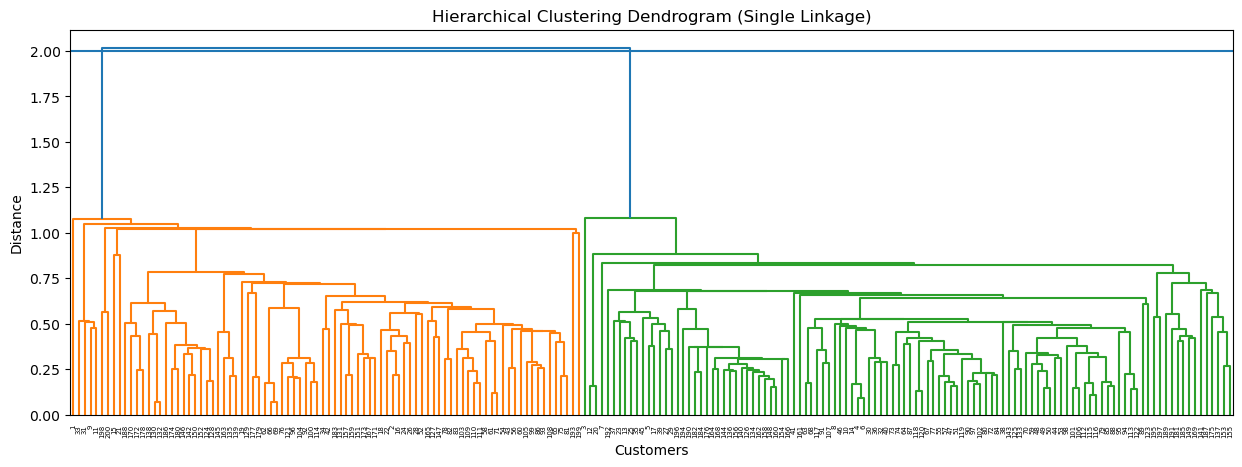

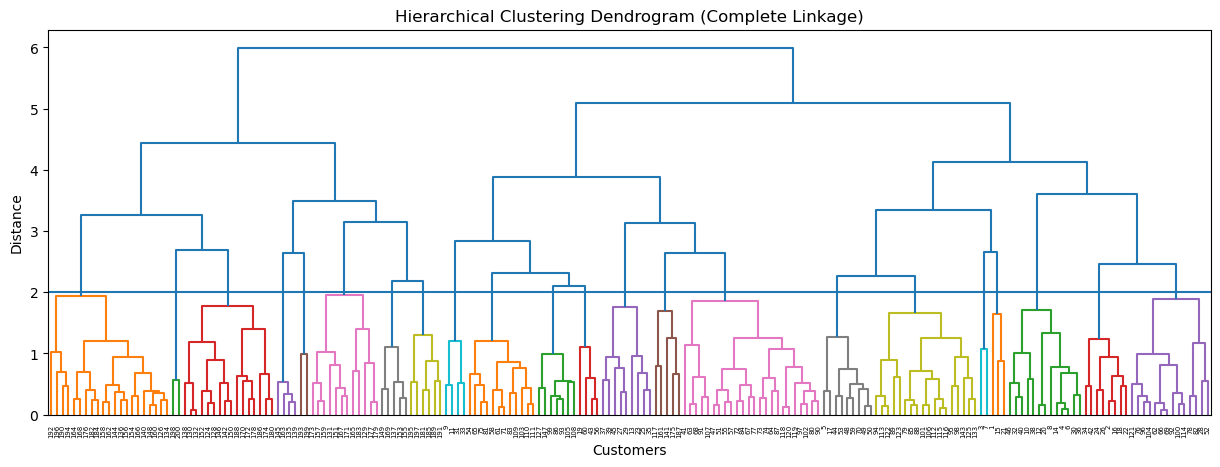

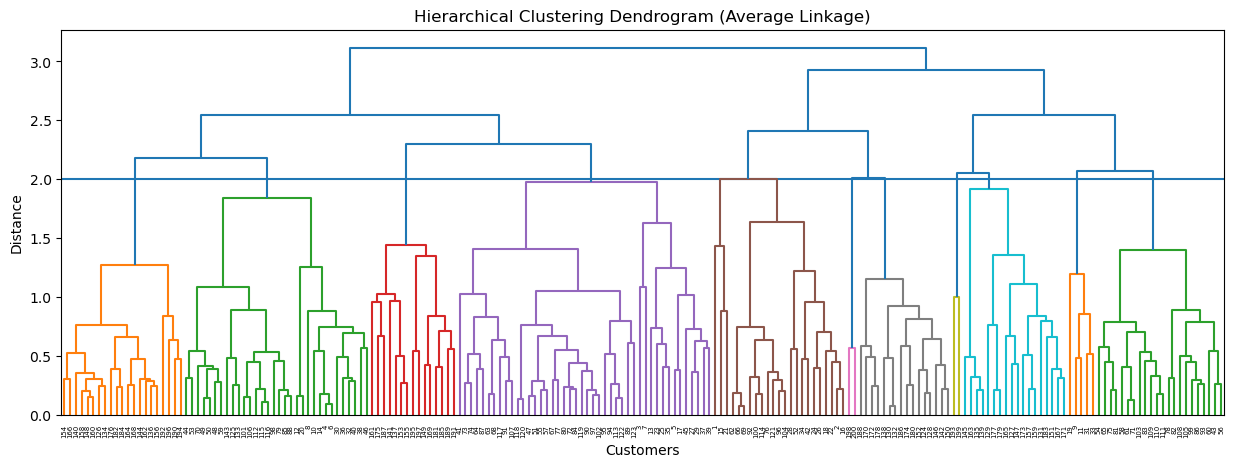

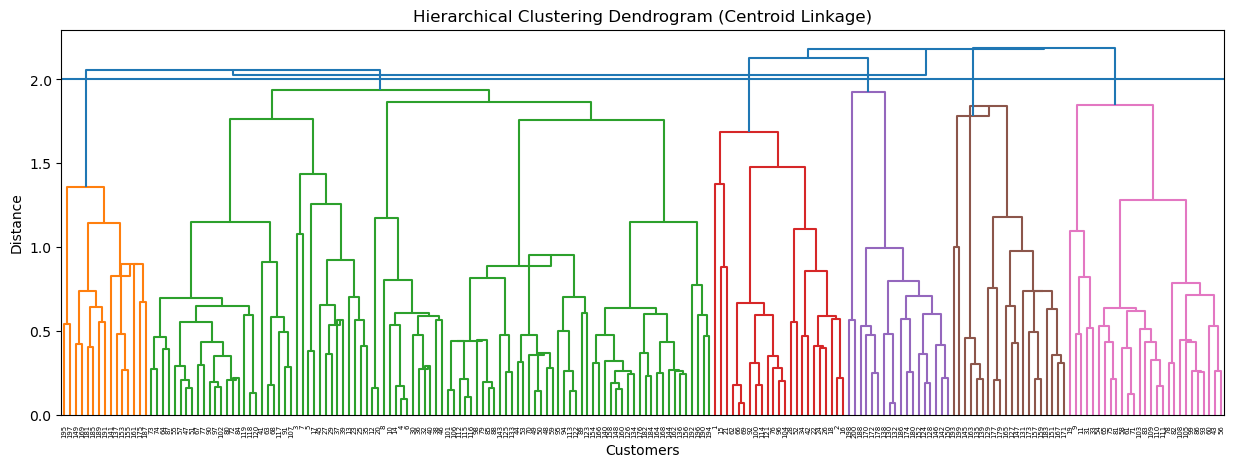

In [501]:
# Loop through each linkage method and plot its dendrogram
for method, linkage_matrix in linkage_dict.items():
    plt.figure(figsize=(15, 5))
    plt.title(f'Hierarchical Clustering Dendrogram ({method.capitalize()} Linkage)')
    plt.xlabel('Customers')
    plt.ylabel('Distance')
    # Draw horizontal threshold line at distance = 2
    plt.axhline(y=2)
    dendrogram(linkage_matrix, labels=customers1.index, color_threshold=2)
    plt.show()

In [502]:
# Count number of clusters formed at a threshold of 2 for each method
cluster_counts = {}
for method, linkage_matrix in linkage_dict.items():
    clusters = fcluster(linkage_matrix, t=2, criterion='distance')
    cluster_counts[method] = len(set(clusters))

print(cluster_counts)

{'single': 2, 'complete': 22, 'average': 11, 'centroid': 6}


In [504]:
# Check silhouette score
for method, linkage_matrix in linkage_dict.items():
    clusters = fcluster(linkage_matrix, t=2, criterion='distance')
    if len(set(clusters)) > 1: 
        score = silhouette_score(customers1, clusters)
        print(f'{method.capitalize()} linkage: silhouette score = {score:.3f}')
    else:
        print(f'{method.capitalize()} linkage: only 1 cluster, silhouette score not applicable')

Single linkage: silhouette score = 0.278
Complete linkage: silhouette score = 0.393
Average linkage: silhouette score = 0.373
Centroid linkage: silhouette score = 0.276



### Best linkage is the "Average" linkage as it doesn't have a complex number of clusters and has the second best silhouette score at 2 units of distance.


In [508]:
# K-means Evalutaion
# Standardize data
customers2 = pd.DataFrame(standardizer.transform(customers),
                          columns = customers.columns,
                          index = customers.index)

In [510]:
# Define cluster range
cluster_num = range(2, 25)

# Lists to hold metrics
inertias = []
silhouette_scores = []

# Fit models and collect metrics
for k in cluster_num:
    model = KMeans(n_clusters=k, n_init=10, random_state= 12)
    model.fit(customers2)
    inertias.append(model.inertia_)

    labels = model.labels_
    score = silhouette_score(customers2, labels)
    silhouette_scores.append(score)

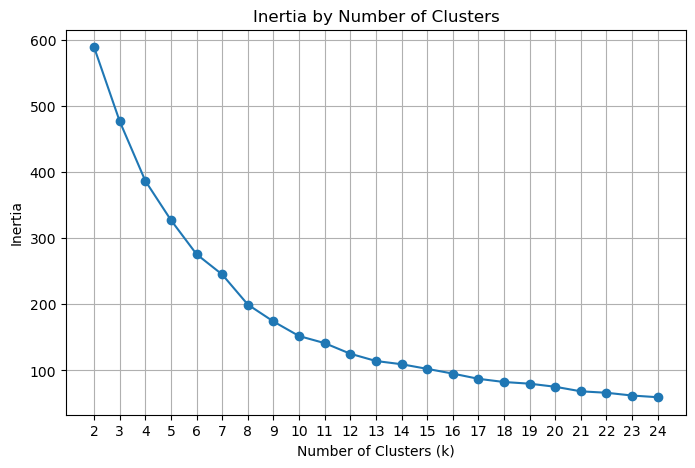

In [511]:
# Plot inertia elbow chart
plt.figure(figsize=(8, 5))
plt.plot(cluster_num, inertias, '-o')
plt.title('Inertia by Number of Clusters')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.grid(True)
plt.xticks(cluster_num)
plt.show()

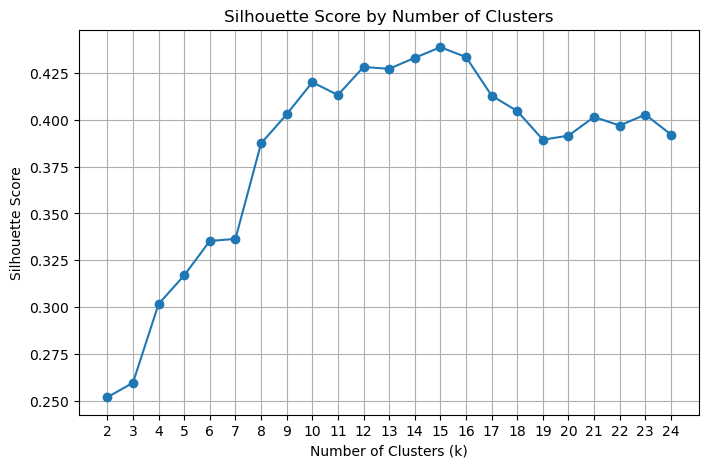

In [514]:
# Plot Silhouette Score chart
plt.figure(figsize=(8, 5))
plt.plot(cluster_num, silhouette_scores, '-o')
plt.title('Silhouette Score by Number of Clusters')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Silhouette Score')
plt.grid(True)
plt.xticks(cluster_num)
plt.show()

In [516]:
# Fit the KMeans model with the chosen number of clusters (k=9) based on the 'elbow' method and silhouette scores
kModel = KMeans(n_clusters = 9, n_init=10, random_state = 12)
kResult = kModel.fit(customers2)
customers2.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100)
CustomerID,,,,
1,1.128152,-1.424569,-1.738999,-0.434801
2,1.128152,-1.281035,-1.738999,1.195704
3,-0.886405,-1.352802,-1.700830,-1.715913
4,-0.886405,-1.137502,-1.700830,1.040418
5,-0.886405,-0.563369,-1.662660,-0.395980


In [518]:
# Get the sum of squareddistances from the results (results.intertia_)
print(kResult.inertia_)
print(kResult.n_iter_)
print(kResult.labels_)
labels = kResult.labels_

174.11984372928396
5
[6 6 3 8 3 8 3 8 1 8 1 8 5 8 1 6 3 6 1 8 6 6 5 6 5 6 5 6 5 8 1 8 1 6 5 8 5
 8 3 8 5 6 1 3 5 8 5 3 3 3 5 6 3 1 5 1 5 1 3 1 1 6 5 5 1 6 5 5 6 3 1 5 5 5
 1 6 5 6 3 5 1 6 1 5 3 1 5 3 3 5 5 6 1 3 3 6 5 3 1 6 3 5 1 6 1 3 5 1 1 1 1
 3 3 6 3 3 5 5 5 5 6 3 2 0 3 2 7 0 1 0 7 0 3 2 7 2 4 0 7 2 4 0 3 2 7 0 7 2
 4 0 7 0 4 2 4 2 7 2 7 2 4 2 7 2 7 2 7 2 4 0 7 0 7 0 4 2 7 0 7 0 4 2 7 2 4
 0 4 0 4 2 4 2 7 2 4 2 4 0 7 0]


In [520]:
# Verify silhouette score for 9 clusters
silhouette_score(customers2, labels)

0.40297196042062366

In [522]:
# print out the dataset with the cluster designations
customers_with_labels = customers2.copy()
customers_with_labels['labels'] = kResult.labels_
customers_with_labels

,Gender,Age,Annual Income (k$),Spending Score (1-100),labels
CustomerID,,,,,
1,1.128152,-1.424569,-1.738999,-0.434801,6
2,1.128152,-1.281035,-1.738999,1.195704,6
3,-0.886405,-1.352802,-1.700830,-1.715913,3
4,-0.886405,-1.137502,-1.700830,1.040418,8
5,-0.886405,-0.563369,-1.662660,-0.395980,3
...,...,...,...,...,...
196,-0.886405,-0.276302,2.268791,1.118061,2
197,-0.886405,0.441365,2.497807,-0.861839,4
198,1.128152,-0.491602,2.497807,0.923953,0


In [524]:
# Check how large each cluster is
unique, counts = np.unique(labels, return_counts= True)
dict(zip(unique, counts))

{0: 18, 1: 27, 2: 22, 3: 29, 4: 15, 5: 33, 6: 24, 7: 19, 8: 13}

### K-means clustering is better than hierarchical clustering in this case due to higher silhouette score (0.402 vs. 0.373) and simpler quantity of clusters (9 vs. 11).